# Задача 1
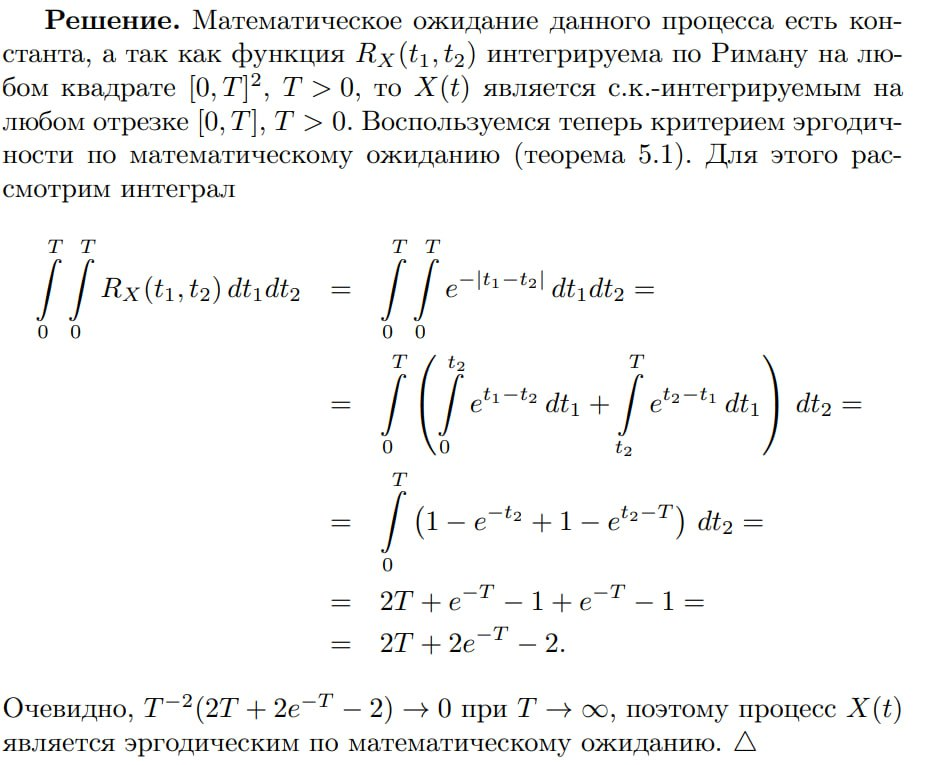

# Задача 2. 
Продемонстрировать эмпирически вывод сделаный в задаче 1 (показать, что интеграл сходится).

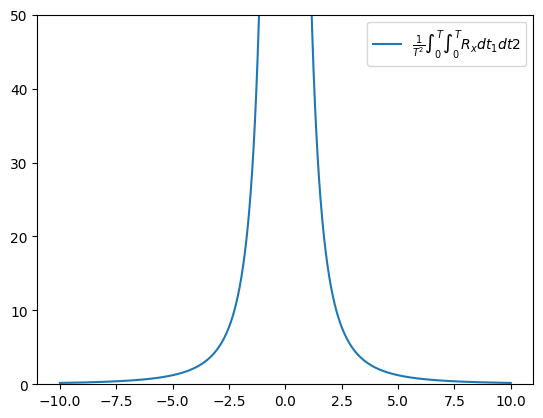

In [1]:

import numpy as np
import matplotlib.pyplot as plt

f = lambda t1, t2: np.exp(-abs(t1 - t2))

space = lambda a: (lambda s: np.meshgrid(s, s)) (np.linspace(0, a, 10))
steps = np.linspace(-10, 10, 1000)

integrals = [np.sum(f(*space(T))) / T**2 for T in steps]


plt.ylim(0, 50)
plt.plot(steps, integrals, label="$\\frac{1}{T^2} \int_0^T \int_0^T R_x dt_1 dt2$")
plt.legend()

# Задача 3.
Эмпирически исследовать случайный процесс из задачи имплементации модели страхования Спарре-Андерсона на эргодичность  по  математическому  ожиданию.

Общий размер выплат к времени t: [0, 0, -9, 0, 0, 0, 5, 0, 9, 1, 1, -14, 4, 8, -4, -18, -3, -8, 8, 14, 0, 13, 7, 5, -26, 15, -14, 14, -7, -8, -4, -2, 28, -20, -8, 13, -7, 9, 17, 11, 22, 3, -3, 7, -16, 13, 14, -16, -30, 31, 10, -22, 31, -9, 24, -3, 22, -22, -17, 3, 23, 24, 8, -3, 12, 12, -6, -20, -25, 0, 1, -40, 13, 1, 15, 16, -48, -7, -27, -25, 5, 4, 11, 11, -3, -16, 3, -15, 7, -2, -9, -26, 8, -34, 68, -10, 24, 52, 25, 24, 18, -45, 4, 50, -28, 35, 11, 11, 22, -29, 73, -10, -29, 23, -41, -45, -13, -14, 7, 25, 22, -32, -4, 25, -32, -38, 10, 8, 19, 11, -27, -22, 4, -50, -13, -9, -16, -66, -25, -1, -16, -26, -52, -17, -12, -13, -29, -74, 33, -37, 38, -63, -21, 7, -45, 1, 10, 61, -28, -32, 27, -12, 13, 31, -40, 26, 13, 20, 2, -1, 62, 52, -7, 67, -31, 34, -6, 20, 25, -45, 38, 38, -38, 46, 9, 41, -52, 38, -30, -23, -50, -7, 1, -110, 5, -43, 6, -4, 15, 141, 21, -76, 8, -91, 7, -24, 16, 29, 5, -26, -36, -10, 20, 44, -37, -23, 21, -21, 64, -42, 8, -70, -20, 16, 53, 47, 54, -4, 48, -56, -48, -10,

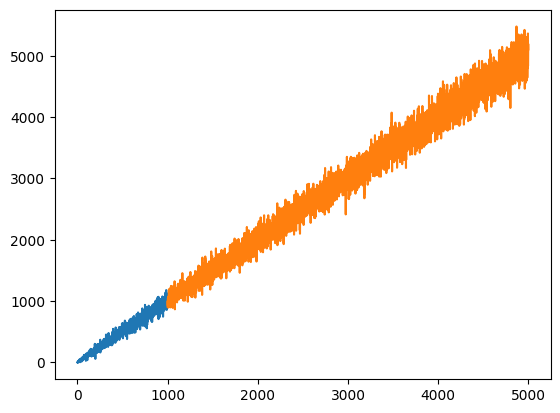

In [11]:
import numpy as np 
import random
import matplotlib.pyplot as plt
def model_insurance_sparre_anderson(y0=0,c=1, count=100, count_min=0):
    '''
    c-скорость поступления страховых взносов\n
    y0-начальный капитал страховой компании
    '''
    Yt_list = [] 
    save_recup = []
    x_r_list = []
    for t in range(count_min, count):
        Yt = y0
        Sn = 0
        iter = 0
        while Sn <= t:
            # Генерируем время между страховыми выплатами
            csi = random.randint(0,10)
            # Время n-й выплаты
            Sn += csi

            iter += 1
            if Sn>t:
                save_recup.append(iter-1)
        
        # Размер n-й выплаты
        x_r = [random.randint(-10,10) for i in range(save_recup[t] if t in save_recup else save_recup[-1])] 
        x_r_list.append(sum(x_r))

        # Текущий капитал компании в момент времени t
        Yt = c*t - sum(x_r)
        Yt_list.append(Yt)
    print(f"Общий размер выплат к времени t: {x_r_list}")
    print(f"Текущий капитал компании в момент времени t: {Yt_list}")
    return Yt_list   

Yt_1 = model_insurance_sparre_anderson(count=1000, count_min=0) # Текущий капитал компании в момент времени t
Yt_2 = model_insurance_sparre_anderson(count=5000, count_min=1000) # Текущий капитал компании в момент времени t
xt_1 = np.linspace(0, 1000, len(Yt_1))
xt_2 = np.linspace(1000, 5000, len(Yt_2))
print()
plt.plot(xt_1, Yt_1)
plt.plot(xt_2, Yt_2)

mean_1 = np.array(Yt_1).mean() # mean() — математическое ожидание
mean_2 = np.array(Yt_2).mean() # mean() — математическое ожидание
print("Математическое ожидание выборки 1:", mean_1)
print("Математическое ожидание выборки 2:", mean_2)
